## Model Interpretability

### Abstract:

Interpreting Machine Learning models is no longer a luxury but a necessity.

In this project i will take a explain various ways to explain potential black-box machine learning models in a model-agnostic way. I will be working on a real-world dataset on Census income, also known as the Adult dataset available in the UCI ML Repository where we will be predicting if the potential income of people is more than $50K/yr or not.

The purpose of this project is manifold. The first main objective is to familiarize ourselves with the major state-of-the-art model interpretation frameworks out there (a lot of them being extensions of LIME - the original framework and approach proposed for model interpretation).


I will cover usage of the following model interpretation frameworks in my mini project.
- [__ELI5__](https://github.com/TeamHG-Memex/eli5)
- [__LIME__](https://github.com/marcotcr/lime)
- [__SHAP__](https://github.com/slundberg/shap)

The major model interpretation techniques i will be covering in this miniproject include the following.

- Interpretable Model Methods
- Feature Importances
- Partial Dependence Plots
- Individual Conditional Expectation Plots
- Model Prediction Explanations with Local Interpretation
- Model Prediction Explanation with SHAP values
- Dependence & Interaction Plots with SHAP

# Load Dependencies

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import shap
import eli5
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
%matplotlib inline

shap.initjs()

The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.


# Load the Census Income Dataset

In [4]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
data, labels = shap.datasets.adult(display=True)
labels = np.array([int(label) for label in labels])

print(data.shape, labels.shape)
data.head()

(32561, 12) (32561,)


Age          Workclass  Education-Num       Marital Status  \
0  39.0          State-gov           13.0        Never-married   
1  50.0   Self-emp-not-inc           13.0   Married-civ-spouse   
2  38.0            Private            9.0             Divorced   
3  53.0            Private            7.0   Married-civ-spouse   
4  28.0            Private           13.0   Married-civ-spouse   

           Occupation    Relationship    Race      Sex  Capital Gain  \
0        Adm-clerical   Not-in-family   White     Male        2174.0   
1     Exec-managerial         Husband   White     Male           0.0   
2   Handlers-cleaners   Not-in-family   White     Male           0.0   
3   Handlers-cleaners         Husband   Black     Male           0.0   
4      Prof-specialty            Wife   Black   Female           0.0   

   Capital Loss  Hours per week         Country  
0           0.0            40.0   United-States  
1           0.0            13.0   United-States  
2           0.0            40.0   United-States  
3           0.0            40.0   United-States  
4           0.0            40.0            Cuba

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             32561 non-null  float32 
 1   Workclass       32561 non-null  category
 2   Education-Num   32561 non-null  float32 
 3   Marital Status  32561 non-null  category
 4   Occupation      32561 non-null  category
 5   Relationship    32561 non-null  category
 6   Race            32561 non-null  category
 7   Sex             32561 non-null  category
 8   Capital Gain    32561 non-null  float32 
 9   Capital Loss    32561 non-null  float32 
 10  Hours per week  32561 non-null  float32 
 11  Country         32561 non-null  category
dtypes: category(7), float32(5)
memory usage: 862.2 KB


## Exploring the dataset

**Count of >50K & <=50K**

<AxesSubplot:ylabel='count'>

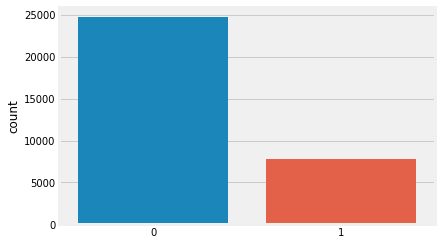

In [6]:
sns.countplot(labels,label="Count")

**Explore Education Num vs Income**

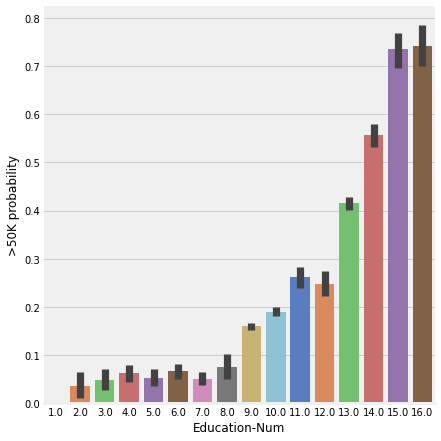

In [7]:
g = sns.factorplot(x="Education-Num",y=labels,data=data,kind="bar",size = 6,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

**Explore Hours Per Week vs Income**

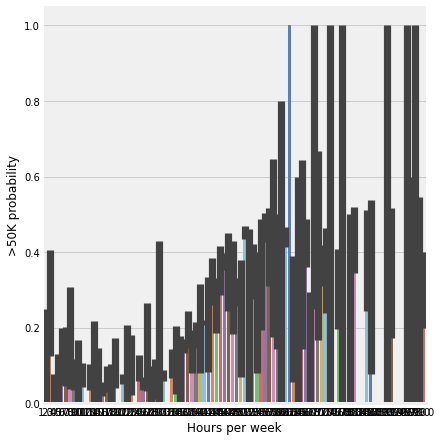

In [8]:
g  = sns.factorplot(x="Hours per week",y=labels,data=data,kind="bar",size = 6,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

**Explore Sex vs Income**

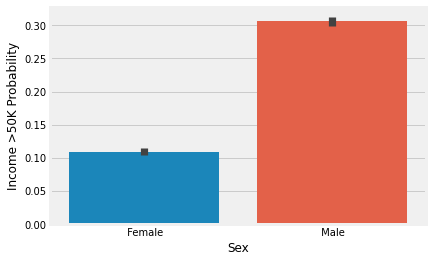

In [9]:
g = sns.barplot(x="Sex",y=labels,data=data)
g = g.set_ylabel("Income >50K Probability")

**Explore people in different workclass**

<AxesSubplot:ylabel='Workclass'>

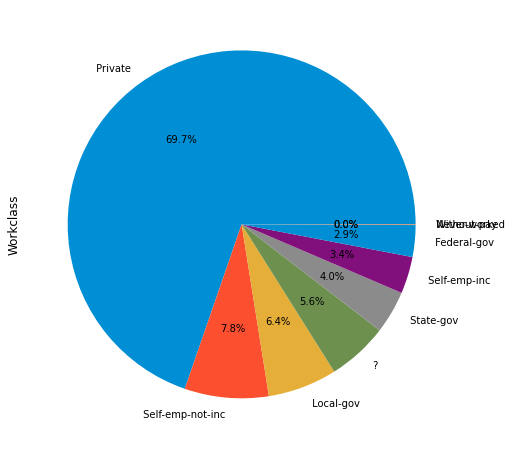

In [10]:
plt.figure(figsize=(8, 8))
data['Workclass'].value_counts().plot.pie(autopct='%1.1f%%')

# Basic Feature Engineering

In [11]:
data = pd.get_dummies(data)
data.head()

Age  Education-Num  Capital Gain  Capital Loss  Hours per week  \
0  39.0           13.0        2174.0           0.0            40.0   
1  50.0           13.0           0.0           0.0            13.0   
2  38.0            9.0           0.0           0.0            40.0   
3  53.0            7.0           0.0           0.0            40.0   
4  28.0           13.0           0.0           0.0            40.0   

   Workclass_ ?  Workclass_ Federal-gov  Workclass_ Local-gov  \
0             0                       0                     0   
1             0                       0                     0   
2             0                       0                     0   
3             0                       0                     0   
4             0                       0                     0   

   Workclass_ Never-worked  Workclass_ Private  ...  Country_ Portugal  \
0                        0                   0  ...                  0   
1                        0                   0  ...                  0   
2                        0                   1  ...                  0   
3                        0                   1  ...                  0   
4                        0                   1  ...                  0   

   Country_ Puerto-Rico  Country_ Scotland  Country_ South  Country_ Taiwan  \
0                     0                  0               0                0   
1                     0                  0               0                0   
2                     0                  0               0                0   
3                     0                  0               0                0   
4                     0                  0               0                0   

   Country_ Thailand  Country_ Trinadad&Tobago  Country_ United-States  \
0                  0                         0                       1   
1                  0                         0                       1   
2                  0                         0                       1   
3                  0                         0                       1   
4                  0                         0                       0   

   Country_ Vietnam  Country_ Yugoslavia  
0                 0                    0  
1                 0                    0  
2                 0                    0  
3                 0                    0  
4                 0                    0  

[5 rows x 91 columns]

In [12]:
Counter(labels)

Counter({0: 24720, 1: 7841})

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((22792, 91), (9769, 91))

In [14]:
X_train.head(3)

Age  Education-Num  Capital Gain  Capital Loss  Hours per week  \
19749  34.0            9.0           0.0        2179.0            12.0   
1216   48.0           10.0        7688.0           0.0            40.0   
27962  23.0           10.0           0.0           0.0            30.0   

       Workclass_ ?  Workclass_ Federal-gov  Workclass_ Local-gov  \
19749             0                       0                     0   
1216              0                       0                     0   
27962             0                       0                     0   

       Workclass_ Never-worked  Workclass_ Private  ...  Country_ Portugal  \
19749                        0                   0  ...                  0   
1216                         0                   0  ...                  0   
27962                        0                   0  ...                  0   

       Country_ Puerto-Rico  Country_ Scotland  Country_ South  \
19749                     0                  0               0   
1216                      0                  0               0   
27962                     0                  0               0   

       Country_ Taiwan  Country_ Thailand  Country_ Trinadad&Tobago  \
19749                0                  0                         0   
1216                 0                  0                         0   
27962                0                  0                         0   

       Country_ United-States  Country_ Vietnam  Country_ Yugoslavia  
19749                       1                 0                    0  
1216                        1                 0                    0  
27962                       1                 0                    0  

[3 rows x 91 columns]

# Building a Machine Learning Model

In [15]:
%%time

import xgboost as xgb

xgc = xgb.XGBClassifier(n_estimators=500, max_depth=10, base_score=0.5,
                        objective='binary:logistic', random_state=42)
xgc.fit(X_train, y_train)

CPU times: user 2min 32s, sys: 890 ms, total: 2min 32s
Wall time: 21.4 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [16]:
predictions = xgc.predict(X_test)
predictions[:10]

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

In [17]:
import sklearn.metrics as metrics
class_labels = list(set(labels))
print('Model Performance metrics:')
print('Accuracy:', np.round(metrics.accuracy_score(y_test, predictions),4))
print('Precision:', np.round(metrics.precision_score(y_test,predictions,average='weighted'),4))
print('Recall:', np.round(metrics.recall_score(y_test, predictions,average='weighted'), 4))
print('F1 Score:', np.round(metrics.f1_score(y_test, predictions, average='weighted'), 4))

Model Performance metrics:
Accuracy: 0.8508
Precision: 0.8471
Recall: 0.8508
F1 Score: 0.8485


In [18]:
print('\nModel Classification report:')
report = metrics.classification_report(y_test, predictions, class_labels) 
print(report)


Model Classification report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      7455
           1       0.70      0.64      0.67      2314

    accuracy                           0.85      9769
   macro avg       0.80      0.78      0.79      9769
weighted avg       0.85      0.85      0.85      9769



# Using Interpretable Models - Feature Importance Plots

In [19]:
booster = xgc.get_booster()
fs_dict = booster.get_score(importance_type='gain')
fn = booster.feature_names
fs = np.array([fs_dict.get(f, 0.) 
                    for f in fn], dtype=np.float32)
feature_imps = {k: v for k, v in zip(fn, fs)}
feature_imps_list = sorted(list(feature_imps.items()), key=lambda x:-x[1])
feature_names = [r[0] for r in feature_imps_list]
feature_scores = [r[1] for r in feature_imps_list]

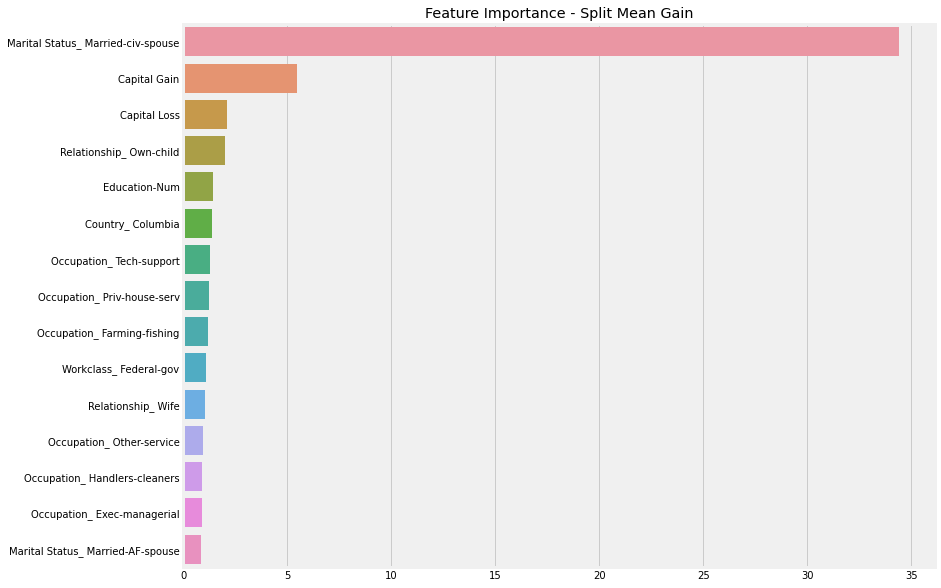

In [20]:
fig = plt.figure(figsize = (12, 10))
ax = fig.add_subplot(1, 1, 1)
sns.barplot(y=feature_names[:15], 
            x = feature_scores[:15],
            orient='h', ax=ax)
t = ax.set_title("Feature Importance - Split Mean Gain")

# Model Interpretability with ELI5

[__ELI5__](https://github.com/TeamHG-Memex/eli5) is a Python package which helps to debug machine learning classifiers and explain their predictions in an easy to understand an intuitive way. However it doesn't support true model-agnostic interpretations and support for models are mostly limited to tree-based and other parametric/linear models.

It provides support for the following machine learning frameworks and packages:

scikit-learn, Keras, xgboost, LightGBM, CatBoost, lightning, sklearn-crfsuite

### Installation Instructions

installing this framework using __`pip install eli5`__ 

## Global Interpretation - Feature Importances with ELI5

Typically for tree-based models ELI5 does nothing special but uses the out-of-the-box feature importance computation methods which is similar to feature importance of xgboost. By default, __'gain'__ is used, that is the average gain of the feature when it is used in trees.

In [21]:
eli5.show_weights(xgc.get_booster())

## Local Interpretation - Explaining Model Prediction Decisions with ELI5

One of the best way to explain model prediction decisions to either a technical or a more business-oriented individual, is to  examine individual data-point predictions. Typically, ELI5 does this by showing weights for each feature depicting how influential it might have been in contributing to the final prediction decision across all trees. ELI5 provides an independent implementation of this algorithm for XGBoost and most scikit-learn tree ensembles which is definitely on the path towards model-agnostic interpretation but not purely model-agnostic like LIME.

Typically, the prediction can be defined as the sum of the feature contributions + the “bias”

### Predicting when a person's income <= $50K 

Here we can see the most influential features being the Age, Hours per week, Marital Status, Occupation & Relationship

In [22]:
doc_num = 0
print('Actual Label:', y_test[doc_num])
print('Predicted Label:', predictions[doc_num])
eli5.show_prediction(xgc.get_booster(), X_test.iloc[doc_num], 
                     feature_names=list(data.columns),
                     show_feature_values=True, top=(7, 8))

Actual Label: 0
Predicted Label: 0


### Predicting when a person's income > \$50K 

Here we can see the most influential features being the Education, Relationship, Occupation, Hours per week & Marital Status

In [23]:
doc_num = 2
print('Actual Label:', y_test[doc_num])
print('Predicted Label:', predictions[doc_num])
eli5.show_prediction(xgc.get_booster(), X_test.iloc[doc_num], 
                     feature_names=list(data.columns),
                     show_feature_values=True, top=(8, 7))

Actual Label: 1
Predicted Label: 1


It is definitely interesting to see how similar features play an influential role in explaining model prediction decisions for both classes!

# Model Agnostic Interpretablity - Partial Dependence Plot

The partial dependence plot (short PDP or PD plot) shows the marginal effect one or two features have on the predicted outcome of a machine learning model. A partial dependence plot can show whether the relationship between the target and a feature is linear, monotonic or more complex. 

We perturb the feature of interest and predict with our trained model for various values of the feature of interest keeping other features as they are to see the effect the feature has on the model.

In [24]:
def par_dep(xs, frame, model, resolution=20, bins=None):
    
    # turn off pesky Pandas copy warning
    pd.options.mode.chained_assignment = None
    
    # initialize empty Pandas DataFrame with correct column names
    par_dep_frame = pd.DataFrame(columns=[xs, 'partial_dependence'])
    
    # cache original column values 
    col_cache = frame.loc[:, xs].copy(deep=True)
  
    # determine values at which to calculate partial dependence
    if bins == None:
        min_ = frame[xs].min()
        max_ = frame[xs].max()
        by = (max_ - min_)/resolution
        bins = np.arange(min_, max_, by)
    # calculate partial dependence  
    # by setting column of interest to constant 
    # and scoring the altered data and taking the mean of the predictions
    for j in bins:
        # perturb feature values for each %tile bin value
        # keep other features as they are
        frame.loc[:, xs] = j
        # evaluate model performance based on the perturbation
        par_dep_i = pd.DataFrame(model.predict_proba(frame)[:, 1])
        par_dep_j = par_dep_i.mean()[0]
        par_dep_frame = par_dep_frame.append({xs:j,
                                              'partial_dependence': par_dep_j}, 
                                              ignore_index=True)
        
    # return input frame to original cached state    
    frame.loc[:, xs] = col_cache

    return par_dep_frame

In [25]:
edu_pdp = par_dep('Education-Num', X_test, xgc)
edu_pdp

Education-Num  partial_dependence
0            1.00            0.090023
1            1.75            0.090023
2            2.50            0.107104
3            3.25            0.107104
4            4.00            0.125914
5            4.75            0.121073
6            5.50            0.126469
7            6.25            0.126469
8            7.00            0.121851
9            7.75            0.165065
10           8.50            0.181817
11           9.25            0.181817
12          10.00            0.222386
13          10.75            0.228276
14          11.50            0.226250
15          12.25            0.226572
16          13.00            0.286263
17          13.75            0.320126
18          14.50            0.360805
19          15.25            0.360805

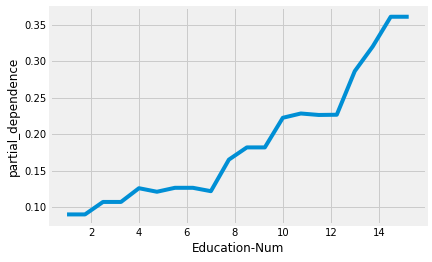

In [26]:
p = sns.lineplot(x='Education-Num', y='partial_dependence', data=edu_pdp)

# Model Agnostic Interpretability - ICE (Individual Conditional Expectation) Plot


Individual Conditional Expectation (ICE) plots display one line per instance that shows how the instance’s prediction changes when a feature changes.

The partial dependence plot for the average effect of a feature is a global method because it does not focus on specific instances, but on an overall average. The equivalent to a PDP for individual data instances is called individual conditional expectation (ICE) plot

An ICE plot visualizes the dependence of the prediction on a feature for each instance separately, resulting in one line per instance, compared to one line overall in partial dependence plots. A PDP is the average of the lines of an ICE plot. 

The values for a line (and one instance) can be computed by keeping all other features the same, creating variants of this instance by replacing the feature’s value with values from a grid and making predictions with the black box model for these newly created instances. The result is a set of points for an instance with the feature value from the grid and the respective predictions.

In [27]:
def get_percentile_dict(yhat, frame):
    
    # create a copy of frame and sort it by yhat
    sort_df = frame.copy(deep=True)
    sort_df.reset_index(inplace=True, drop=True)
    sort_df.sort_values(yhat, inplace=True)
    
    # find top and bottom percentiles
    percentiles_dict = {}
    
    percentiles_dict[0] = sort_df.iloc[0].name
    # find 10th-90th percentiles
    inc = sort_df.shape[0]//10
    for i in range(1, 10):
        percentiles_dict[i * 10] = sort_df.iloc[i * inc].name
    percentiles_dict[99] = sort_df.iloc[sort_df.shape[0]-1].name

    return percentiles_dict



def plot_par_dep_ICE(xs, par_dep_frame):
    
    # initialize figure and axis
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # plot ICE curves
    par_dep_frame.drop('partial_dependence', axis=1).plot(x=xs, 
                                                          colormap='YlOrRd',
                                                          ax=ax)

    # overlay partial dependence, annotate plot
    par_dep_frame.plot(title='Partial Dependence and ICE for ' + str(xs),
                       x=xs, 
                       y='partial_dependence',
                       style='k--', 
                       linewidth=3, 
                       ax=ax)

    # add legend
    _ = plt.legend(bbox_to_anchor=(1.05, 0),
                   loc=3, 
                   borderaxespad=0.)

One place to start with ICE is to calculate ICE curves at every decile of predicted probabilities in a dataset, giving an indication of local prediction behavior across the dataset. 

In [28]:
X_test_cp = X_test.reset_index(drop=True).copy(deep=True)

yhat_test = pd.concat([X_test_cp, pd.DataFrame(xgc.predict_proba(X_test_cp)[:,1])], axis=1)
yhat_test = yhat_test.rename(columns={0:'p_gt_50K'})
edu_percentiles = get_percentile_dict('p_gt_50K', yhat_test)
edu_percentiles

{0: 595,
 10: 895,
 20: 5244,
 30: 9623,
 40: 6951,
 50: 5050,
 60: 9000,
 70: 7733,
 80: 5187,
 90: 3998,
 99: 4673}

In [29]:
edu_bins = edu_pdp['Education-Num'].tolist()
edu_bins

[1.0,
 1.75,
 2.5,
 3.25,
 4.0,
 4.75,
 5.5,
 6.25,
 7.0,
 7.75,
 8.5,
 9.25,
 10.0,
 10.75,
 11.5,
 12.25,
 13.0,
 13.75,
 14.5,
 15.25]

In [30]:
for row in sorted(edu_percentiles.keys()):
    col_name = 'Percentile_' + str(row)
    
    # ICE curves for PAY_0 across percentiles at bins_PAY_0 intervals
    edu_pdp[col_name] = par_dep('Education-Num', 
                                X_test_cp.iloc[[edu_percentiles[row]]],
                                xgc,
                                bins=edu_bins)['partial_dependence']

In [31]:
edu_pdp

Education-Num  partial_dependence  Percentile_0  Percentile_10  \
0            1.00            0.090023  2.528601e-10   3.187742e-06   
1            1.75            0.090023  2.528601e-10   3.187742e-06   
2            2.50            0.107104  3.936115e-10   6.815144e-06   
3            3.25            0.107104  3.936115e-10   6.815144e-06   
4            4.00            0.125914  1.131929e-09   7.642017e-06   
5            4.75            0.121073  8.807743e-10   8.225608e-06   
6            5.50            0.126469  4.063284e-10   8.776860e-06   
7            6.25            0.126469  4.063284e-10   8.776860e-06   
8            7.00            0.121851  1.092757e-09   1.089856e-05   
9            7.75            0.165065  9.394786e-10   5.329000e-06   
10           8.50            0.181817  4.783045e-10   1.162400e-05   
11           9.25            0.181817  4.783045e-10   1.162400e-05   
12          10.00            0.222386  3.492911e-09   1.521831e-05   
13          10.75            0.228276  1.508761e-08   1.097777e-05   
14          11.50            0.226250  7.496697e-09   5.341843e-06   
15          12.25            0.226572  7.496697e-09   5.341843e-06   
16          13.00            0.286263  5.576644e-09   7.164542e-06   
17          13.75            0.320126  2.674213e-09   8.185886e-06   
18          14.50            0.360805  1.108394e-09   8.896236e-07   
19          15.25            0.360805  1.108394e-09   8.896236e-07   

    Percentile_20  Percentile_30  Percentile_40  Percentile_50  Percentile_60  \
0        0.000006       0.001538       0.077176       0.005451       0.691215   
1        0.000006       0.001538       0.077176       0.005451       0.691215   
2        0.000011       0.005595       0.234129       0.007930       0.205459   
3        0.000011       0.005595       0.234129       0.007930       0.205459   
4        0.000021       0.000610       0.096725       0.042555       0.078187   
5        0.000065       0.000217       0.081650       0.033796       0.036738   
6        0.000171       0.000097       0.036106       0.003045       0.063297   
7        0.000171       0.000097       0.036106       0.003045       0.063297   
8        0.000139       0.000012       0.002469       0.010396       0.041836   
9        0.000086       0.000030       0.004800       0.020124       0.073563   
10       0.000069       0.000032       0.002870       0.014552       0.199580   
11       0.000069       0.000032       0.002870       0.014552       0.199580   
12       0.000064       0.000507       0.033789       0.002118       0.028381   
13       0.000091       0.000599       0.029079       0.001515       0.264437   
14       0.000146       0.000684       0.027046       0.000439       0.061287   
15       0.000159       0.000751       0.027046       0.000439       0.061287   
16       0.000382       0.000636       0.052800       0.000031       0.206177   
17       0.001187       0.001988       0.193759       0.000035       0.089209   
18       0.001550       0.001119       0.574434       0.000045       0.354819   
19       0.001550       0.001119       0.574434       0.000045       0.354819   

    Percentile_70  Percentile_80  Percentile_90  Percentile_99  
0        0.031562       0.000893       0.014949       0.999998  
1        0.031562       0.000893       0.014949       0.999998  
2        0.101108       0.001507       0.024645       0.999999  
3        0.101108       0.001507       0.024645       0.999999  
4        0.121708       0.005858       0.017186       0.999999  
5        0.126923       0.005621       0.034560       0.999999  
6        0.143039       0.167489       0.028846       0.999998  
7        0.143039       0.167489       0.028846       0.999998  
8        0.143359       0.021015       0.043494       0.999994  
9        0.203493       0.197741       0.321657       1.000000  
10       0.292664       0.275323       0.425509       1.000000  
11       0.292664       0.275323       0.425509    

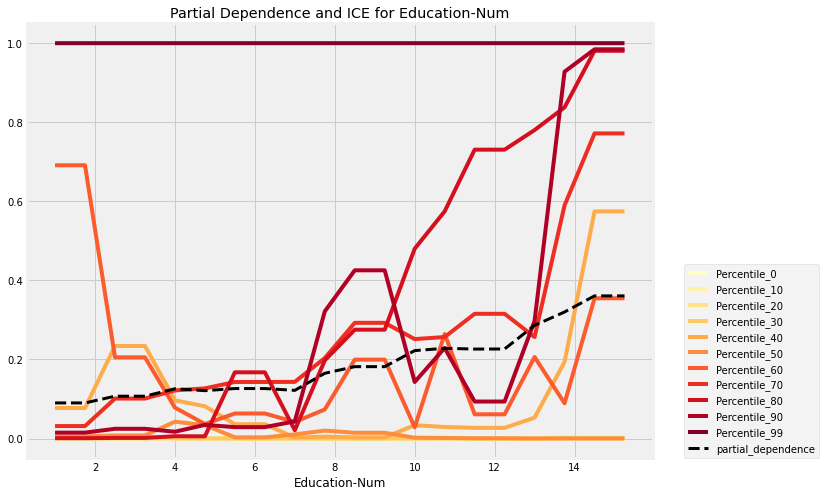

In [32]:
plot_par_dep_ICE('Education-Num', edu_pdp)

Monotonic increasing prediction behavior for Education-Num is displayed for all percentiles of model predictions. Predition behavior is different at different deciles, but not abnormal or vastly different from the average prediction behavior represented by the black dotted partial dependence curve. 

If a variable's partial dependence curve is mostly flat, the model should not be very sensitive to changes in the value of the variable and this variable would be expected to have low importance. If your model is placing high importance on a variable with a flat partial dependence curve, this could indicate a problem with your model training process, or the partial dependence itself could be misleading because the variable in question could be part of a group of strongly correlated variables or variables with strong interactions. ICE will be used to help increase the trustworthiness of partial dependence in the steps below. If the average global behavior of partial dependence is representative of the individual ICE curves, the partial dependence is likely trustworthy. If ICE curves diverge from partial dependence curves, this is an indication of strong correlation or interactions in the model training data which can cause accuracy problems in many cases. ICE also clues users into any local disparate impact, drift, or security problems: ICE can show if certain regions of the model's response function are overly sensitive to an indivual's demographic segment or to any other changes in input variable values that may be interesting from a model drift or adversarial attack perspective.

# Local Interpretable Model-Agnostic Explanations(LIME)
LIME is a novel algorithm designed by Riberio Marco, Singh Sameer, Guestrin Carlos to access the behavior of the any machine learning model using interpretable surrogate models (e.g. linear classifier/regressor). Such form of comprehensive evaluation helps in generating explanations which are locally faithful but may not align with the global behavior. Basically, LIME explanations are based on local surrogate models. These, surrogate models are interpretable models (like a linear model or decision tree) that are learned on the predictions of the original black box model. But instead of trying to fit a global surrogate model, LIME focuses on fitting local surrogate models to explain why single predictions were made.

The idea is very intuitive. To start with, just try and unlearn what you have done so far! Forget about the training data, forget about how your model works! Think that your model is a black box model with some magic happening inside, where you can input data points and get the models predicted outcomes. You can probe this magic black box as often as you want with inputs and get output predictions.

Now, you main objective is to understand why the machine learning model which you are treating as a magic black box, gave the outcome it produced. LIME tries to do this for you! It tests out what happens to you black box model's predictions when you feed variations or perturbations of your dataset into the black box model. Typically, LIME generates a new dataset consisting of perturbed samples and the associated black box model's predictions. On this dataset LIME then trains an interpretable model weighted by the proximity of the sampled instances to the instance of interest. Following is a standard high-level workflow for this.
 - Choose your instance of interest for which you want to have an explanation of the predictions of your black box model.
 - Perturb your dataset and get the black box predictions for these new points.
 - Weight the new samples by their proximity to the instance of interest.
 - Fit a weighted, interpretable (surrogate) model on the dataset with the variations.
 - Explain prediction by interpreting the local model.

## Explaining Model Predictions using LIME

The __`LimeTabularExplainer`__ class helps in explaining predictions on tabular data. For numerical features, it unsettles them by sampling from a Normal(0,1) and doing the inverse operation of mean-centering and scaling, according to the means and standard deviations in the training data. For categorical features, it unsettles by sampling according to the training distribution, and making a binary feature that is 1 when the value is the same as the instance being explained. The __`explain_instance()`__ function generates explanations for a prediction. First, generate neighborhood data by randomly perturbing features from the instance. Then, learn locally weighted linear models on this neighborhood data to explain each of the classes in an interpretable way.

Since XGBoost has some issues with feature name ordering when building models with dataframes, I built our same model with numpy arrays to make LIME work without additional hassles of feature re-ordering. The model being built is the same ensemble model which we treat as our black box machine learning model

In [33]:
from lime.lime_tabular import LimeTabularExplainer

xgc_np = xgb.XGBClassifier(n_estimators=500, max_depth=10, base_score=0.5,
                        objective='binary:logistic', random_state=42)
xgc_np.fit(X_train.values, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [34]:
exp = LimeTabularExplainer(X_test.values, feature_names=list(data.columns), 
                           discretize_continuous=True, 
                           class_names=['$50K or less', 'More than $50K'])

In [35]:
doc_num = 0
print('Actual Label:', y_test[doc_num])
print('Predicted Label:', predictions[doc_num])
exp.explain_instance(X_test.iloc[doc_num].values, 
                     xgc_np.predict_proba, 
                     num_samples=50000).show_in_notebook()

Actual Label: 0
Predicted Label: 0


In [36]:
doc_num = 5
print('Actual Label:', y_test[doc_num])
print('Predicted Label:', predictions[doc_num])
exp.explain_instance(X_test.iloc[doc_num].values, 
                     xgc_np.predict_proba,
                     num_samples=50000).show_in_notebook()

Actual Label: 1
Predicted Label: 1


# Model Interpretation with SHAP

**SHAP (SHapley Additive exPlanations)** is a unified approach to explain the output of any machine learning model. SHAP connects game theory with local explanations, uniting several previous methods and representing the only possible consistent and locally accurate additive feature attribution method based on what they claim!


### Install

```
pip install shap
```


The really awesome aspect about this framework is while SHAP values can explain the output of any machine learning model, for really complex ensemble models it can be slow. But they have developed a high-speed exact algorithm for tree ensemble methods ([Tree SHAP arXiv paper](https://arxiv.org/abs/1802.03888)). Fast C++ implementations are supported for *XGBoost*, *LightGBM*, *CatBoost*, and *scikit-learn* tree models!

SHAP (SHapley Additive exPlanations) assigns each feature an importance value for a particular prediction. Its novel components include: the identification of a new class of additive feature importance measures, and theoretical results showing there is a unique solution in this class with a set of desirable properties. Typically, SHAP values try to explain the output of a model ( as a sum of the effects of each feature being introduced into a conditional expectation. Importantly, for non-linear functions the order in which features are introduced matters. The SHAP values result from averaging over all possible orderings. Proofs from game theory show this is the only possible consistent approach. 

An intuitive way to understand the Shapley value is the following: The feature values enter a room in random order. All feature values in the room participate in the game (= contribute to the prediction). The Shapley value __$ϕ_{ij}$__ is the average marginal contribution of feature value __$x_{ij}$__ by joining whatever features already entered the room before, i.e.

$$\phi_{ij}=\sum_{\text{All.orderings}}val(\{\text{features.before.j}\}\cup{}x_{ij})-val(\{\text{features.before.j}\})$$

The following figure from the KDD 18 paper, [_Consistent Individualized Feature Attribution for Tree Ensembles_](https://arxiv.org/pdf/1802.03888.pdf) summarizes this in a nice way!

![shap](https://user-images.githubusercontent.com/52816494/101267949-59d2ad80-372c-11eb-9692-237bc4b78367.png)



## Explain predictions with SHAP

I use the Tree SHAP implementation integrated into XGBoost to explain the test dataset! Remember that there are a variety of explainer methods based on the type of models you are building. We estimate the SHAP values for a set of samples (test data)

In [37]:
explainer = shap.TreeExplainer(xgc, data=X_train)
shap_values = explainer.shap_values(X_test)
pd.DataFrame(shap_values).head()

100%|===================| 9739/9769 [03:28<00:00]        

0         1         2         3         4         5         6   \
0 -1.384907  0.914459 -0.327922 -0.093965 -0.783138 -0.005242 -0.006217   
1  0.791022 -0.471970 -0.354814 -0.117639  0.390778 -0.004266 -0.012825   
2 -0.742439  2.695501 -0.352325 -0.171064  0.889443 -0.003316  0.016780   
3  0.081097  0.713358 -0.373985 -0.116137  0.318373 -0.002477  0.014263   
4 -0.075214 -0.301465 -5.273988 -0.078069  2.109912 -0.005806 -0.002162   

         7    8         9   ...   81   82   83   84   85   86   87        88  \
0  0.045469  0.0 -0.005576  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.089283   
1 -0.025292  0.0 -0.265493  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.092685   
2  0.051468  0.0 -0.089684  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.072603   
3  0.054420  0.0  0.191700  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.140347   
4  0.051071  0.0  0.022498  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.048101   

    89   90  
0  0.0  0.0  
1  0.0  0.0  
2  0.0  0.0  
3  0.0  0.0  
4  0.0  0.0  

[5 rows x 91 columns]

This returns a matrix of SHAP values (# samples x # features). Each row sums to the difference between the model output for that sample and the expected value of the model output (which is stored as expected_value attribute of the explainer). Typically this difference helps us in explaining why the model is inclined on predicting a specific class outcome.

In [38]:
print('Expected Value:', explainer.expected_value)

Expected Value: -4.440699282467331


### Predicting when a person's income <= \$50K 

SHAP gives a nice reasoning below showing which features were the most influential in the model taking the correct decision of predicting the person's income as below \$50K. The below explanation shows features each contributing to push the model output from the base value to the actual model output. Features pushing the prediction higher are shown in red, those pushing the prediction lower are in blue.

In [39]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

### Predicting when a person's income > \$50K 

Similarly, SHAP gives a nice reasoning below showing which features were the most influential in the model taking the correct decision of predicting the person's income as greater than \$50K.

In [40]:
shap.force_plot(explainer.expected_value, shap_values[5,:], X_test.iloc[5,:])

## Visualizing and explaining multiple predictions

One of the key advantages of SHAP is it can build interactive plots which can visualize and explain multiple predictions at once. Here is visualization of model prediction decisions for the first 1000 test data samples.

In [41]:
shap.force_plot(explainer.expected_value, shap_values[:500,:], X_test.iloc[:500,:])

The above visualization can be read in multiple ways. The sample order by similarity visualization shows some interesting model prediction pattern decisions.

- People who are married seem to have higher SHAP values leading towards the model making decisions of them making > \$50K
- People who are not-married or divorced seem to have higher SHAP values leading towards the model making decisions of them making < \$50K
- Factors like Education Level, Age and Capital Gain also seem to play crucial roles in model decisions


## Feature Importances with SHAP

This basically takes the average of the SHAP value magnitudes across the dataset and plots it as a simple bar chart.

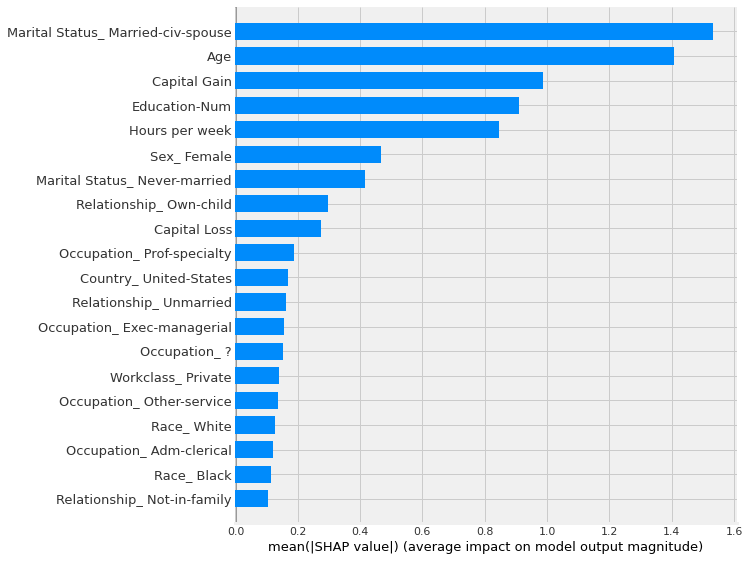

In [42]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

## SHAP Summary Plot

Besides a  feature importance bar chart, SHAP also enables us to use a density scatter plot of SHAP values for each feature to identify how much impact each feature has on the model output for individuals in the validation dataset. Features are sorted by the sum of the SHAP value magnitudes across all samples. It is interesting to note that the age and marital status feature has more total model impact than the captial gain feature, but for those samples where capital gain matters it has more impact than age or marital status. In other words, capital gain effects a few predictions by a large amount, while age or marital status effects all predictions by a smaller amount.

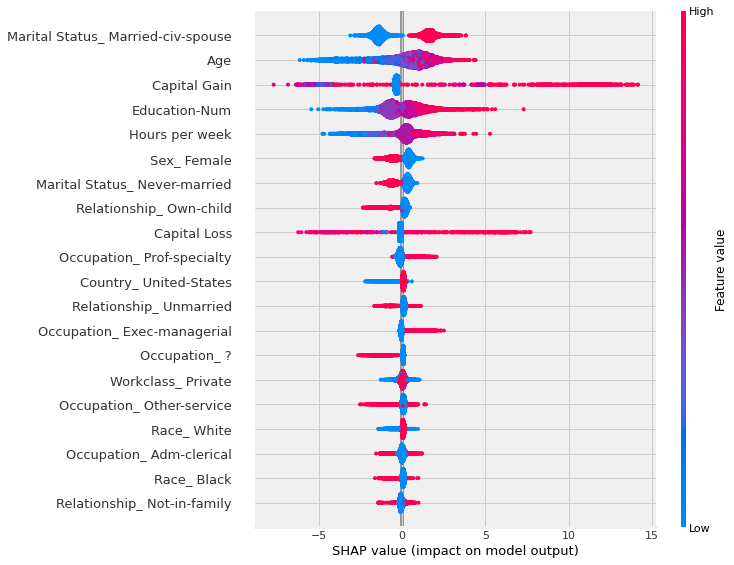

In [43]:
shap.summary_plot(shap_values, X_test)

## SHAP Dependence Plots

SHAP dependence plots show the effect of a single (or two) feature across the whole dataset. They plot a feature's value vs. the SHAP value of that feature across many samples. SHAP dependence plots are similar to partial dependence plots, but account for the interaction effects present in the features, and are only defined in regions of the input space supported by data. The vertical dispersion of SHAP values at a single feature value is driven by interaction effects, and another feature can be chosen for coloring to highlight possible interactions.

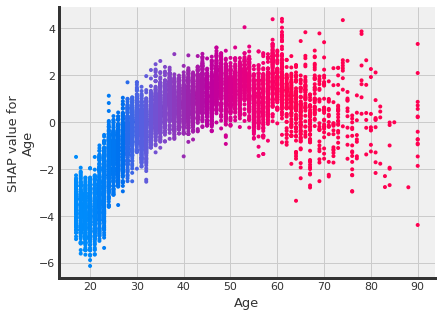

In [44]:
shap.dependence_plot(ind='Age', interaction_index='Age',
                     shap_values=shap_values, 
                     features=X_test,  
                     display_features=X_test)

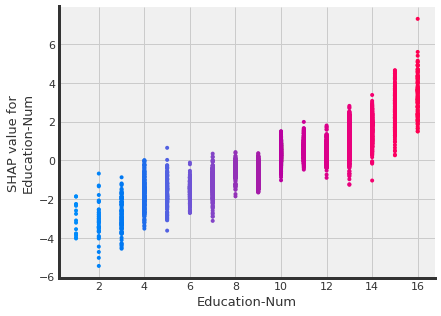

In [45]:
shap.dependence_plot(ind='Education-Num', interaction_index='Education-Num',
                     shap_values=shap_values, 
                     features=X_test,  
                     display_features=X_test)

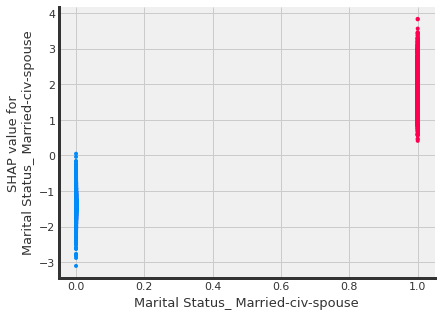

In [46]:
shap.dependence_plot(ind='Marital Status_ Married-civ-spouse', 
                     interaction_index='Marital Status_ Married-civ-spouse',
                     shap_values=shap_values, 
                     features=X_test,  
                     display_features=X_test)

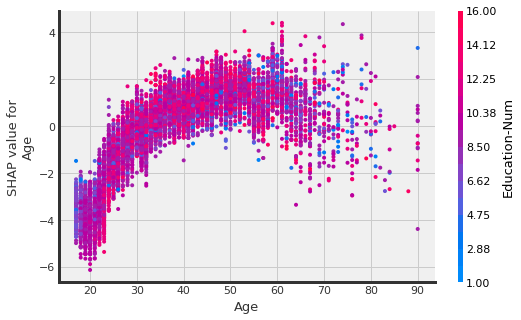

In [47]:
shap.dependence_plot(ind='Age', interaction_index='Education-Num', 
                     shap_values=shap_values, features=X_test, 
                     display_features=X_test)

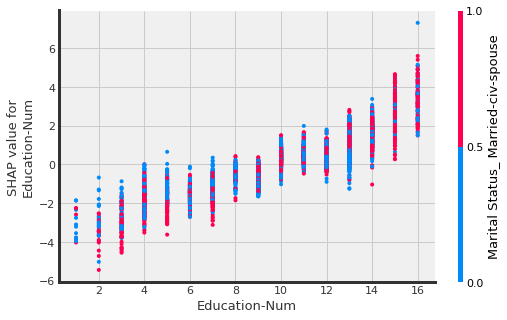

In [48]:
shap.dependence_plot(ind='Education-Num', interaction_index='Marital Status_ Married-civ-spouse', 
                     shap_values=shap_values, features=X_test, 
                     display_features=X_test)

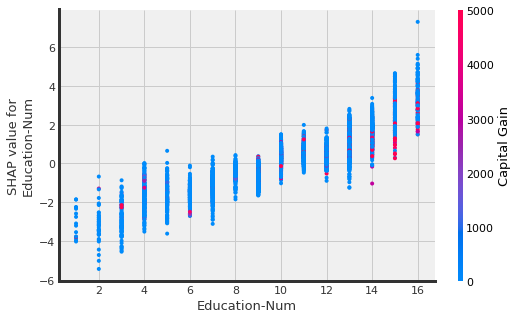

In [49]:
shap.dependence_plot(ind='Education-Num', interaction_index='Capital Gain', 
                     shap_values=shap_values, features=X_test, 
                     display_features=X_test)

## Citations:

- https://towardsdatascience.com/human-interpretable-machine-learning-part-1-the-need-and-importance-of-model-interpretation-2ed758f5f476
- https://github.com/dipanjanS/explainable_artificial_intelligence/tree/master/ODSC%20India%202019
- https://maheshwarappa-a.gitbook.io/ads/
- https://github.com/marcotcr/lime
- https://github.com/slundberg/shap
- https://github.com/TeamHG-Memex/eli5
- https://christophm.github.io/interpretable-ml-book/

### Conclusion:

Model Interpretability is something which can make or break a real-world machine learning project in the industry and helps us come one step closer to explainable artificial intelligence (XAI). We have explained the black box models and how they make the predictions by implementing ELI5, PDP, ICE, LIME and SHAP framework for model interpretation.

MIT License

Copyright (c) 2020 Sumedh Telang

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.